## Imports

In [1]:
from skimage import io
from utils import mask_cell_areas, mask_cell_areas_mask
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import tifffile

## Read in data

In [2]:

image = io.imread(r"/home/julia/AG Kainmüller/Alzheimer_Segmentation_Annotation/tau_nerve_segmentation/data/share_data_2/AO_cBO 10_24h_63x_2022-02-15_AO_CF40_CalB520-APOE590-Tau647_63x_20.13.37_1BGTHP2/page0.tif")
mask = io.imread(r"/home/julia/AG Kainmüller/Alzheimer_Segmentation_Annotation/tau_nerve_segmentation/data/share_data_2/AO_cBO 10_24h_63x_2022-02-15_AO_CF40_CalB520-APOE590-Tau647_63x_20.13.37_1BGTHP2/page0_cp_mask.png")

## Mask area of cells

In [35]:
image_masked, mask_dilated = mask_cell_areas(image, mask.astype(np.uint8), 10)

<class 'numpy.ndarray'>
0
1
2


In [7]:
folders = [r"AO_cBO 10_24h_63x_2022-02-15_AO_CF40_CalB520-APOE590-Tau647_63x_20.13.37_1BGTHP2",
           r"AO_cBO 11_24h_63x_2022-02-15_AO_CF40_CalB520-APOE590-Tau647_63x_18.35.23_1BGTHP2",
           r"AO_cBO 11_24h_63x_2022-02-15_AO_CF40_CalB520-APOE590-Tau647_63x_18.52.09_1BGTHP2",
           r"AO_cBO 12_24h_63x_2022-02-15_AO_CF40_CalB520-APOE590-Tau647_63x_19.05.28_1BGTHP2",
           r"AO_cBO 12_24h_63x_2022-02-15_AO_CF40_CalB520-APOE590-Tau647_63x_19.15.47_1BGTHP2"]
for f in folders:
    for i in range(0,29):
        image = io.imread(r"/home/julia/AG Kainmüller/Alzheimer_Segmentation_Annotation/tau_nerve_segmentation/data/share_data/%s/red_channel_just_cell/page%d_cp_masks.png" % (f, i))
        mask = io.imread(r"/home/julia/AG Kainmüller/Alzheimer_Segmentation_Annotation/tau_nerve_segmentation/data/share_data/masks/blue_channel/%s_page%d_blue.png" % (f, i))
        image_masked, mask_dilated = mask_cell_areas(image, mask.astype(np.uint8), 10)
        tifffile.imsave(r"/home/julia/AG Kainmüller/Alzheimer_Segmentation_Annotation/tau_nerve_segmentation/data/share_data/%s/red_channel_just_cell/page%d_masked.tif" % (f, i), image_masked)

/tmp/ipykernel_3250/1738370650.py:11: DeprecationWarning: <tifffile.imsave> is deprecated. Use tifffile.imwrite
  tifffile.imsave(r"/home/julia/AG Kainmüller/Alzheimer_Segmentation_Annotation/tau_nerve_segmentation/data/share_data/%s/red_channel_just_cell/page%d_masked.tif" % (f, i), image_masked)


In [2]:
folders = [r"AO_cBO 10_24h_63x_2022-02-15_AO_CF40_CalB520-APOE590-Tau647_63x_20.13.37_1BGTHP2",
           r"AO_cBO 11_24h_63x_2022-02-15_AO_CF40_CalB520-APOE590-Tau647_63x_18.35.23_1BGTHP2",
           r"AO_cBO 11_24h_63x_2022-02-15_AO_CF40_CalB520-APOE590-Tau647_63x_18.52.09_1BGTHP2",
           r"AO_cBO 12_24h_63x_2022-02-15_AO_CF40_CalB520-APOE590-Tau647_63x_19.05.28_1BGTHP2",
           r"AO_cBO 12_24h_63x_2022-02-15_AO_CF40_CalB520-APOE590-Tau647_63x_19.15.47_1BGTHP2"]
for i in range(0,29):
    image = io.imread(r"/home/julia/AG Kainmüller/Alzheimer_Segmentation_Annotation/tau_nerve_segmentation/data/share_data/%s/red_channel_just_cell/page%d_cp_masks.png" % (folders[1], i))
    mask = io.imread(r"/home/julia/AG Kainmüller/Alzheimer_Segmentation_Annotation/tau_nerve_segmentation/data/share_data/masks/blue_channel/%s_page%d_blue.png" % (folders[1], i))
    image_masked, mask_dilated = mask_cell_areas_mask(image, mask.astype(np.uint8), 10)
    from PIL import Image
    im = Image.fromarray(image_masked)
    im.save((r"/home/julia/AG Kainmüller/Alzheimer_Segmentation_Annotation/tau_nerve_segmentation/data/share_data/%s/red_channel_just_cell/page%d_masked_cp_masks.png" % (folders[1], i)))

FileNotFoundError: No such file: '/home/julia/AG Kainmüller/Alzheimer_Segmentation_Annotation/tau_nerve_segmentation/data/share_data/AO_cBO 11_24h_63x_2022-02-15_AO_CF40_CalB520-APOE590-Tau647_63x_18.35.23_1BGTHP2/red_channel_just_cell/page21_cp_masks.png'

### Plot results

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


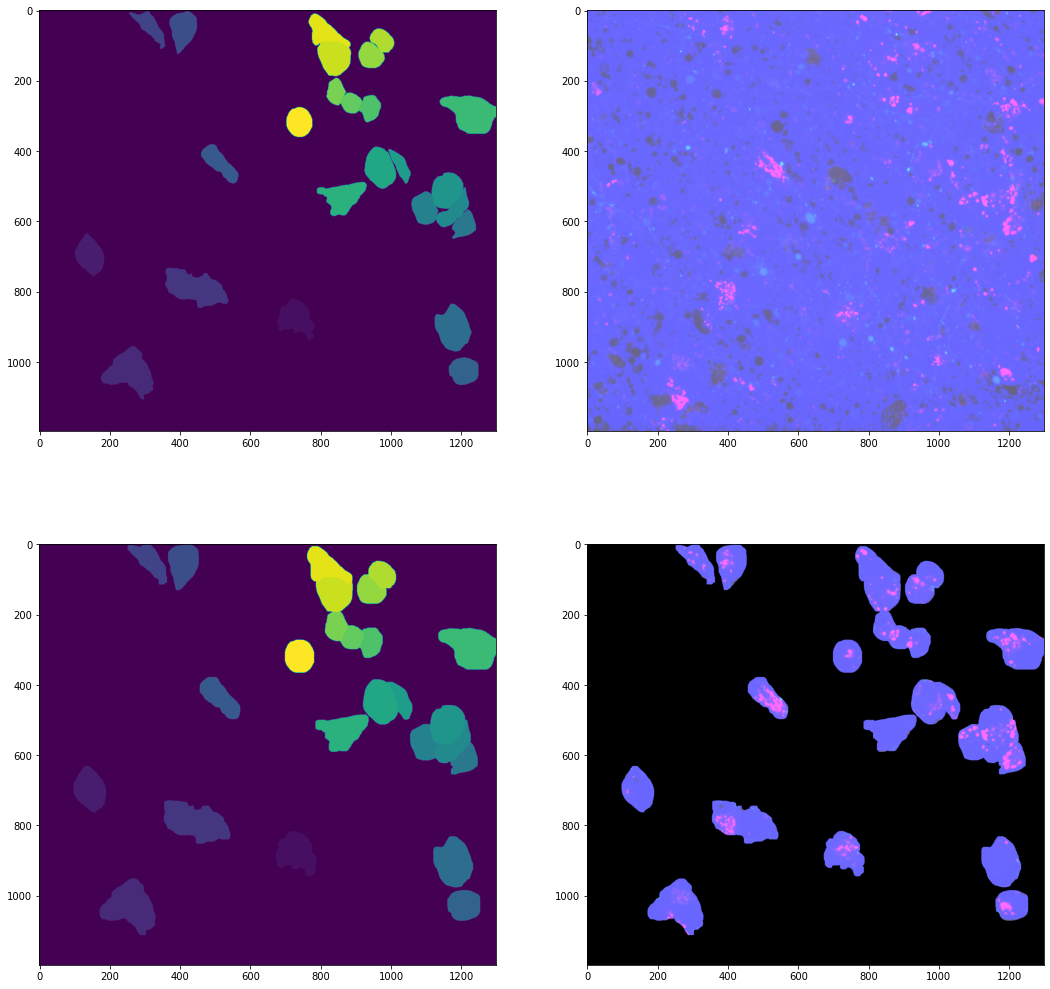

In [36]:
fig, axs = plt.subplots(2, 2, figsize=(18, 18))
axs[0, 0].imshow(mask["masks"])
axs[0, 1].imshow(image)
axs[1, 0].imshow(mask_dilated)
axs[1, 1].imshow(image_masked)
plt.show()

## save image

In [40]:
tifffile.imsave(r"/home/julia/AG Kainmüller/Alzheimer_Segmentation_Annotation/tau_nerve_segmentation/data/blue_channel_cells_verification_label_samples/AO_cBO 10_24h_63x_2022-02-15_AO_CF40_CalB520-APOE590-Tau647_63x_20.13.37_1BGTHP2/page0_masked.tif", image_masked)

(1299, 1197)


/tmp/ipykernel_10691/2028770254.py:3: DeprecationWarning: <tifffile.imsave> is deprecated. Use tifffile.imwrite
  tifffile.imsave(r"/home/julia/AG Kainmüller/Alzheimer_Segmentation_Annotation/tau_nerve_segmentation/data/blue_channel_cells_verification_label_samples/AO_cBO 10_24h_63x_2022-02-15_AO_CF40_CalB520-APOE590-Tau647_63x_20.13.37_1BGTHP2/page0_masked.tif", image_masked)


* cellpose png output is np.uint16 => napari just takes numpy.uint8/32

In [20]:
print(mask["masks"].max())#.astype(np.uint8)

25


In [14]:
from PIL import Image
im = Image.fromarray(mask["masks"])
print(im.dtype)
im.save("page0_mask_test.png")

AttributeError: dtype

In [16]:
import imageio as io

io.imwrite("page0_mask_test.png", mask["masks"])

Lossy conversion from uint32 to uint8. Losing 24 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.
